In [11]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from itertools import chain
import seaborn as sns
import pandas as pd
import random
import json

# Read in Daily Article Totals by Year Across the Study Period

In [51]:
df_2015 = pd.read_csv(f'./yearly/overview_2015.csv')
df_2016 = pd.read_csv(f'./yearly/overview_2016.csv')
df_2017 = pd.read_csv(f'./yearly/overview_2017.csv')
df_2018 = pd.read_csv(f'./yearly/overview_2018.csv')

df_2015['Date'] = df_2015['Date'].astype(str)
df_2016['Date'] = df_2016['Date'].astype(str)
df_2017['Date'] = df_2017['Date'].astype(str)
df_2018['Date'] = df_2018['Date'].astype(str)

# Plot Daily Article Totals for Each Year

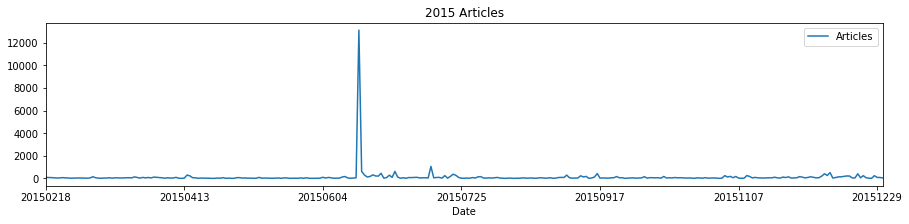

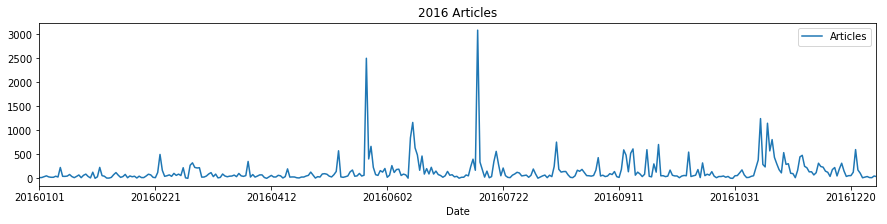

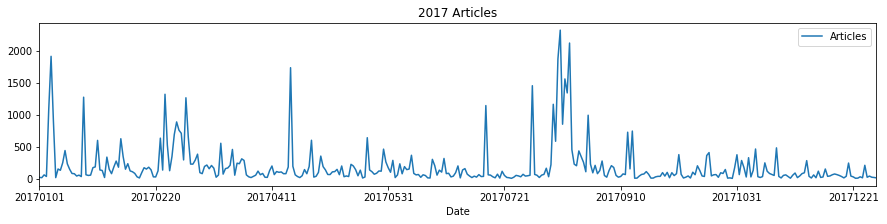

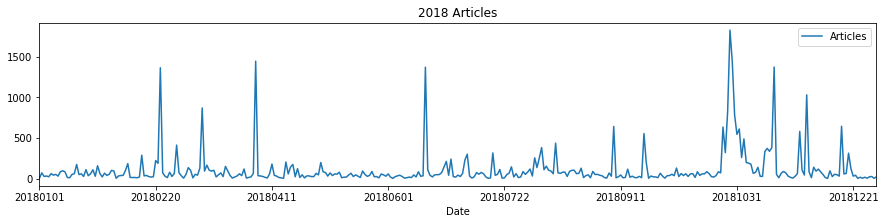

In [52]:
df_2015.plot(x='Date', y='Articles', title='2015 Articles', figsize=(15,3))
df_2016.plot(x='Date', y='Articles', title='2016 Articles', figsize=(15,3))
df_2017.plot(x='Date', y='Articles', title='2017 Articles', figsize=(15,3))
df_2018.plot(x='Date', y='Articles', title='2018 Articles', figsize=(15,3))

# Identifying Emanuel African Methodist Episcopal Church Shooting as Outlier

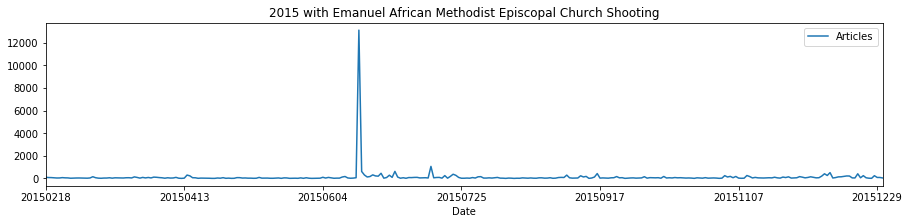

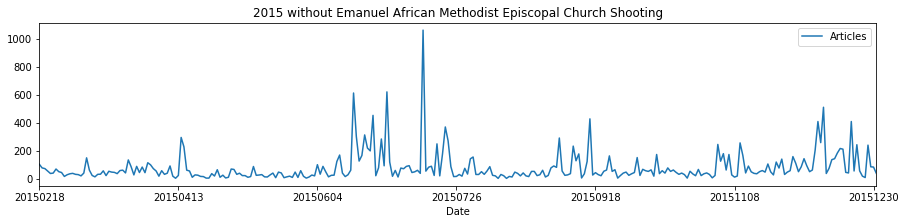

In [53]:
df_2015.plot(x='Date', y='Articles', title='2015 with Emanuel African Methodist Episcopal Church Shooting', figsize=(15, 3))
df_2015[df_2015.Date != '20150618'].plot(x='Date', y='Articles', title='2015 without Emanuel African Methodist Episcopal Church Shooting', figsize=(15, 3))

# Daily Articles Across the Study Period

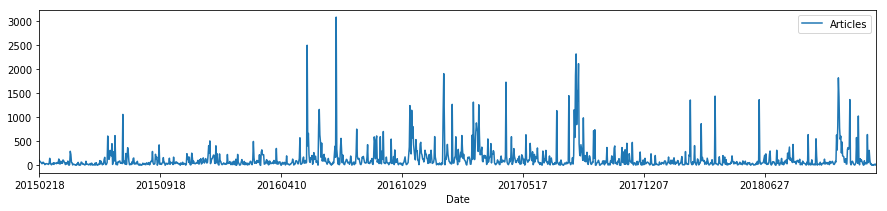

In [54]:
full_df = pd.concat([df_2015, df_2016, df_2017, df_2018])
full_df[full_df.Date != '20150618'].plot(x='Date', y='Articles', figsize=(15, 3))

# Total Articles by Year
- If we remove the outlier for the shooting at the Emanuel African Methodist Episcoal Church, the number of artciles doubles from 2015 to 2016. 

Year
2015    37035
2016    53500
2017    69604
2018    40584
Name: Articles, dtype: int64


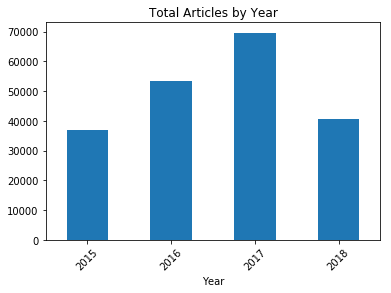

In [55]:
gb = full_df.groupby('Year')['Articles'].agg('sum')
print(gb)
gb.plot(x='Year', kind='bar', rot=45, title='Total Articles by Year')

In [58]:
s = full_df[full_df.Date.between('20150218', '20150220')]
s

,Date,Articles,Year
0,20150218,103,2015
1,20150219,77,2015
2,20150220,72,2015


# Load Event Windows & Build Data Frame

In [60]:
events = json.load(open('gdelt_hate.json', 'rb'))

df = pd.DataFrame.from_dict(events).transpose()

keys = df['keywords'].apply(pd.Series)
keys = keys.rename(columns = lambda x : 'k_' + str(x))
df  = pd.concat([df[:], keys[:]], axis=1)

df.reset_index(inplace=True)
df.rename(index=str, columns={"index": "start_end"}, inplace=True)

df['start'] = df['start_end'].apply(lambda x: x[:8])
df['end']   = df['start_end'].apply(lambda x: x[-8:])
df['year']  = df['start_end'].apply(lambda x: x[:4])

df.fillna(0, inplace=True)
df.sort_values('start_end', inplace=True)

df

,start_end,articles,ascent,descent,keywords,length,movement,tone,k_0,k_1,...,k_7,k_8,k_9,k_10,k_11,k_12,k_13,start,end,year
0,20150413_20150418,672,1,4,"[COLLEGE, SHOOTING, STANCIL, POSSIBLE, COMMUNITY]",6,33,-5.0,COLLEGE,SHOOTING,...,0,0,0,0,0,0,0,20150413,20150418,2015
1,20150503_20150506,176,1,2,"[TEXAS, SPEECH, MUSLIM, GELLER, EVENT, GARLAND]",4,33,-5.0,TEXAS,SPEECH,...,0,0,0,0,0,0,0,20150503,20150506,2015
2,20150617_20150627,15584,1,9,"[CHURCH, CHARLESTON, SHOOTING, SOUTH, WHITE]",11,58,-6.0,CHURCH,CHARLESTON,...,0,0,0,0,0,0,0,20150617,20150627,2015
3,20150630_20150703,849,1,2,"[CHURCH, BLACK, FIRES, CHURCHES, SOUTH]",4,27,-6.0,CHURCH,BLACK,...,0,0,0,0,0,0,0,20150630,20150703,2015
4,20150713_20150718,1349,1,4,"[FLAG, CONFEDERATE, WHITE, MUSLIM, CHARLESTON,...",6,36,-5.0,FLAG,CONFEDERATE,...,POSTED,CHURCH,FLORIDA,OREILLY,SYMBOL,0,0,20150713,20150718,2015
5,20150730_20150802,360,2,1,"[CHURCH, ROOF, FEDERAL, CHARLESTON, GUILTY, SO...",4,19,-7.0,CHURCH,ROOF,...,0,0,0,0,0,0,0,20150730,20150802,2015
6,20150902_20150904,427,1,1,"[BLACK, LIVES, MATTER, WHITE, MAN, INSULTS, RA...",3,15,-6.0,BLACK,LIVES,...,CITY,THATS,CHURCH,ALABAMA,COUNTY,MEN,0,20150902,20150904,2015
7,20150909_20150913,579,1,3,"[SIKH, MUKKER, COUNTRY, CAR, SINGH, LADEN]",5,25,-7.0,SIKH,MUKKER,...,0,0,0,0,0,0,0,20150909,20150913,2015
8,20150915_20150917,577,1,1,"[SIKH, MAN, MUKKER, SINGH, TEEN, ELDERLY, GARCIA]",3,23,-8.0,SIKH,MAN,...,0,0,0,0,0,0,0,20150915,20150917,2015
9,20151002_20151004,218,1,1,"[OREGON, CHRISTIANS, SHOOTING, OBAMA, MERCER, ...",3,12,-7.0,OREGON,CHRISTIANS,...,YOURE,VICTIMS,LAW,RELIGION,WOMEN,UMPQUA,SHOT,20151002,20151004,2015


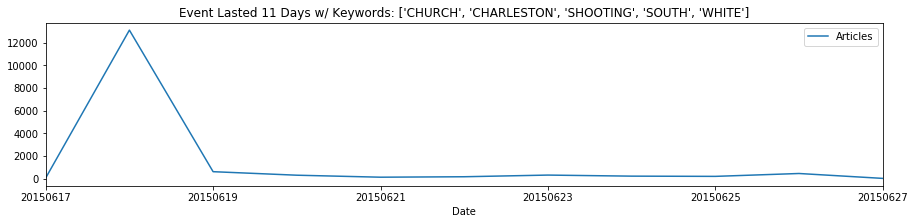

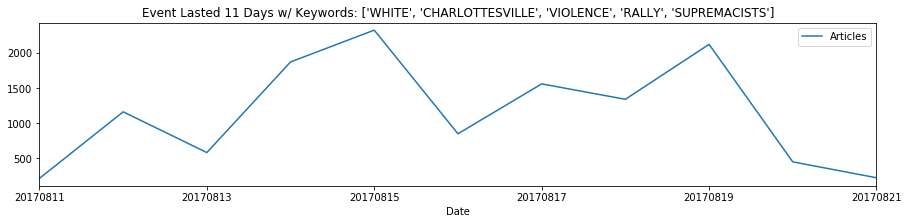

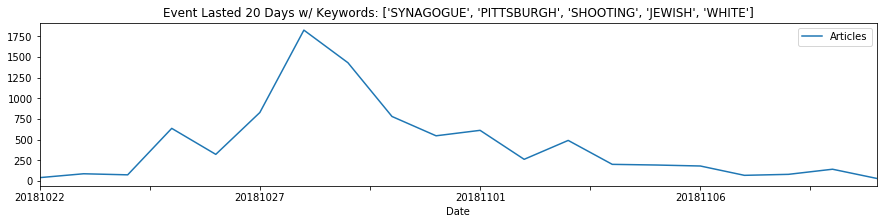

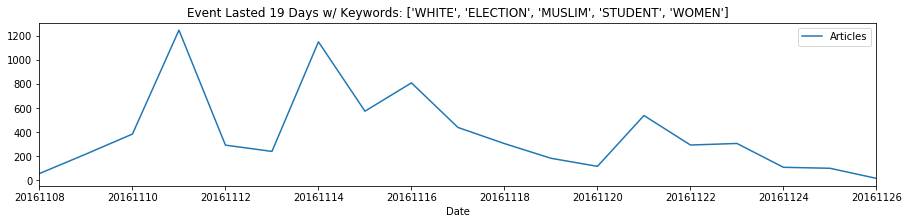

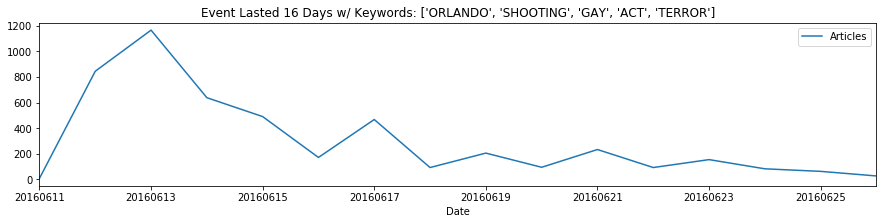

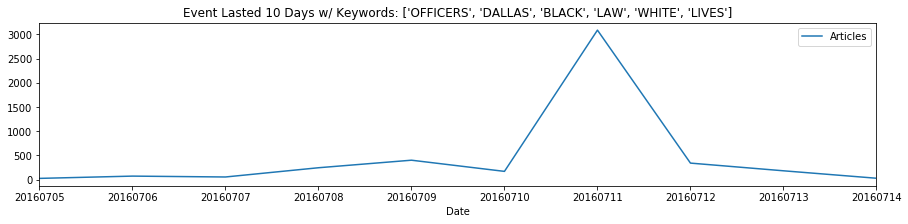

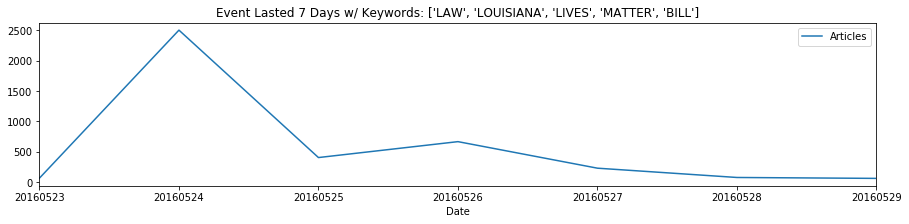

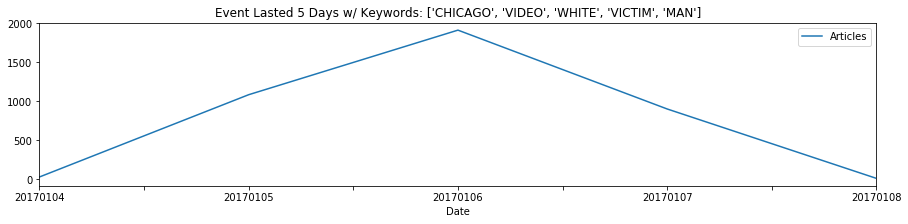

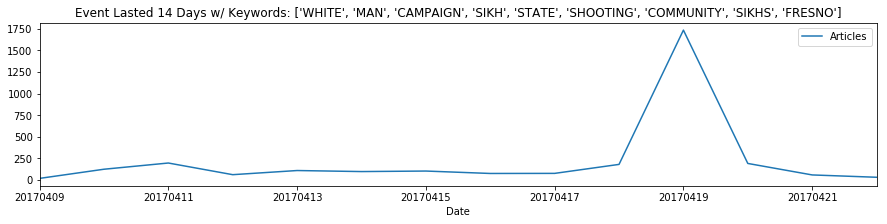

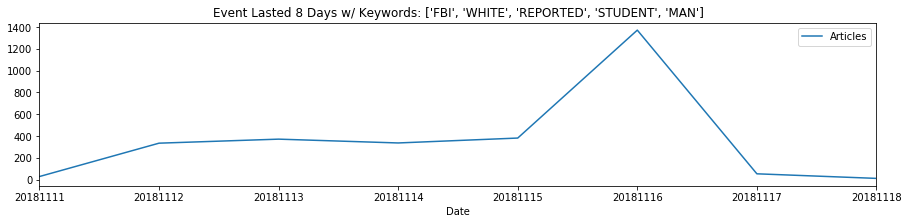

In [89]:
top_windows_by_articles = df.sort_values('articles', ascending=False)[['start_end', 'keywords', 'length']][:10]
for row in top_windows_by_articles.iterrows():
    the_data = row[1]
    start, end = the_data[0].split('_')
    full_df[full_df.Date.between(start, end)].plot(
        title=f'Event Lasted {the_data[2]} Days w/ Keywords: {the_data[1]}',
        x='Date', 
        y='Articles', 
        figsize=(15, 3)
    )

# Count of Windows Across Study Period

      count
2015     13
2016     24
2017     22
2018     16


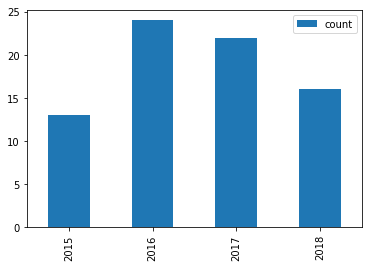

In [14]:
year_counts = df.year.value_counts().to_frame().sort_index()
year_counts.rename(index=str, columns={"year": "count"}, inplace=True)
print(year_counts)
year_counts.plot(kind='bar')

# Filter Outliers for Yearly Metrics
- Emanuel African Methodist Episcopal Church Shooting

In [15]:
metric_df = df[df.start_end != '20150617_20150627']

# General Window Metrics: Articles & Tone by Year
- Median and min articles steadily increase over time.
- Other metrics are stable.

In [16]:
gb = metric_df.groupby('year').agg(['mean', 'median', 'min', 'max'])[['articles', 'tone']]
gb

articles                          tone                 
             mean  median  min    max      mean median  min  max
year                                                            
2015   666.083333   578.0  176   1481 -6.083333   -6.0 -8.0 -5.0
2016  1561.833333   737.5  270   7374 -5.416667   -5.5 -7.0 -4.0
2017  1981.636364  1193.0  238  12701 -5.954545   -6.0 -8.0 -5.0
2018  1693.312500  1415.0  301   8798 -5.875000   -6.0 -7.0 -4.0

# General Window Metrics: Ascent, Descent, Length, Movement by Year
- Descent and Length are roughly 3 times higher in 2018 than in 2015.
- Asecent and Movement are roughly 2 times higher in 2018 than in 2015.

In [17]:
gb = metric_df.groupby('year').agg(['mean', 'median', 'min', 'max'])[['ascent', 'descent', 'length', 'movement']]
gb

ascent                  descent                   length             \
          mean median min max      mean median min max      mean median min   
year                                                                          
2015  1.333333      1   1   4  2.416667    2.0   1   5  4.750000    4.5   3   
2016  1.916667      2   1   6  4.000000    2.5   1  15  6.875000    6.0   3   
2017  2.863636      2   1  10  3.454545    2.0   1  12  7.318182    6.5   3   
2018  2.875000      2   1  10  3.500000    2.0   1  13  7.312500    6.0   3   

           movement                  
     max       mean median min  max  
year                                 
2015   7  32.166667   30.0  12   79  
2016  19  45.916667   39.5  10  119  
2017  15  57.272727   34.0   9  191  
2018  20  58.437500   32.0   2  167

# Top Keywords in Windows

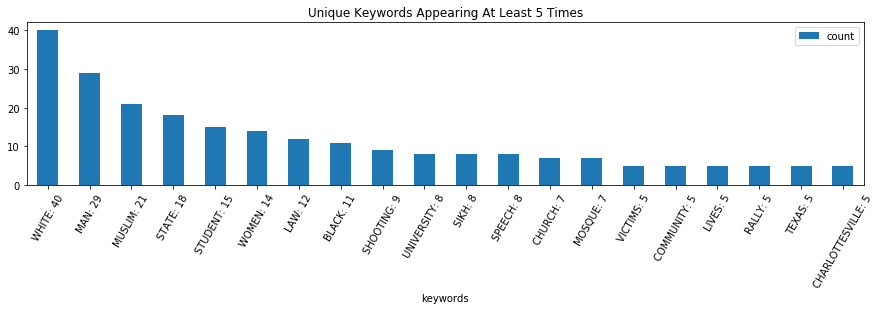

In [18]:
top = 5

all_keywords = list(chain(*df.keywords))

tk_df = pd.DataFrame([['{}: {}'.format(a, b), b] for a, b in Counter(all_keywords).items()], columns=['keywords', 'count'])
tk_df = tk_df[tk_df['count'] >= top]

tk_df.sort_values('count', inplace=True, ascending=False)
tk_df.plot(x='keywords', y='count', kind='bar', title=f'Unique Keywords Appearing At Least {top} Times', figsize=(15, 3), rot=60)

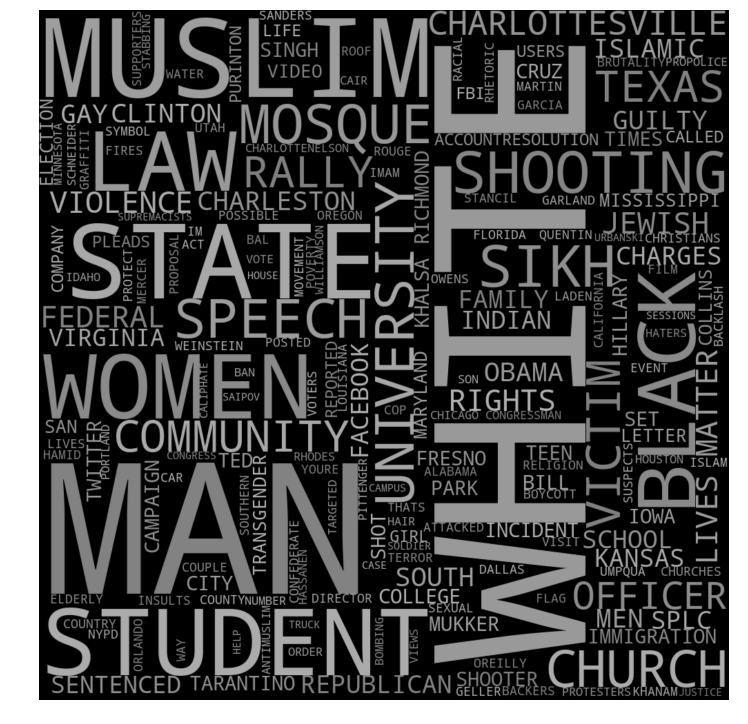

In [28]:
def grey_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % (random.randint(50, 70))


wordcloud = WordCloud(
    width = 1000, 
    height = 1000, 
    min_font_size = 10,
    background_color='black'
)

wordcloud.generate(' '.join(all_keywords))

plt.figure(figsize = (10, 10), facecolor=None)
plt.imshow(wordcloud.recolor(color_func=grey_color, random_state=3), interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0) 
plt.show()

# Keyword Metrics

In [20]:
data  = []
for keyword in tk_df.keywords:
    keyword = keyword.split(':')[0]
    rows = df[df.keywords.apply(lambda x: keyword in x)]
    data.append([keyword, rows.ascent.max(), rows.descent.max(), rows.movement.max(), rows.length.max(), len(rows)])
d = pd.DataFrame(data, columns=['keyword', 'ascent', 'descent', 'movement', 'length', 'count']) 
d.sort_values('count', inplace=True, ascending=False)
d

,keyword,ascent,descent,movement,length,count
0,WHITE,10,15,191,20,40
1,MAN,10,11,168,16,29
2,MUSLIM,7,15,191,19,21
3,STATE,10,11,168,14,18
4,STUDENT,7,15,191,19,15
5,WOMEN,3,15,119,19,14
6,LAW,6,9,118,11,12
7,BLACK,6,11,167,14,11
8,SHOOTING,10,13,168,20,9
11,SPEECH,10,7,191,16,8


# Keyword Co-occurence

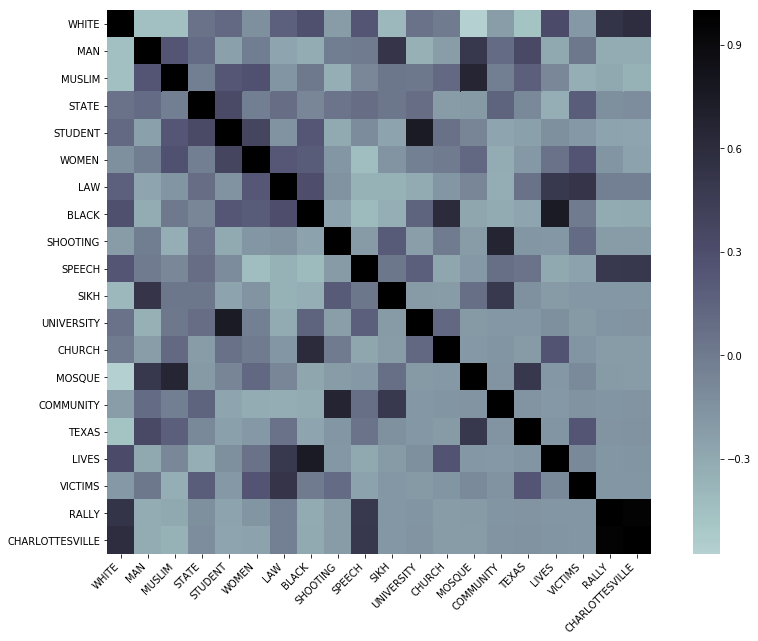

In [21]:
tk = [k[0] for k in Counter(chain(*df.keywords)).most_common(20)]

data = []

for row_k in tk:

    row_vals = []

    for col_k in tk:
        df_a = df[df.keywords.apply(lambda x: row_k in x)]
        df_b = df_a[df_a.keywords.apply(lambda x: col_k in x)]
        row_vals.append((len(df_b) / len(df_a)) * 100)

    data.append(row_vals)

d = pd.DataFrame(data, index=[*tk], columns=[*tk])

plt.figure(figsize=(15, 10))

corr = d.corr()
ax = sns.heatmap(corr, center=0,cmap='bone_r', square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

# Events Greater Than a Week in Duration

In [22]:
wg = df[df.length >= 7]
wg = wg[['start_end', 'ascent', 'descent', 'length', 'movement', 'articles', 'keywords']]
wg.sort_values('articles', inplace=True, ascending=False)
wg

,start_end,ascent,descent,length,movement,articles,keywords
2,20150617_20150627,1,9,11,58,15584,"[CHURCH, CHARLESTON, SHOOTING, SOUTH, WHITE]"
48,20170811_20170821,4,6,11,31,12701,"[WHITE, CHARLOTTESVILLE, VIOLENCE, RALLY, SUPR..."
71,20181022_20181110,6,13,20,123,8798,"[SYNAGOGUE, PITTSBURGH, SHOOTING, JEWISH, WHITE]"
34,20161108_20161126,3,15,19,119,7374,"[WHITE, ELECTION, MUSLIM, STUDENT, WOMEN]"
21,20160611_20160626,2,13,16,109,4814,"[ORLANDO, SHOOTING, GAY, ACT, TERROR]"
22,20160705_20160714,6,3,10,45,4608,"[OFFICERS, DALLAS, BLACK, LAW, WHITE, LIVES]"
20,20160523_20160529,1,5,7,45,4017,"[LAW, LOUISIANA, LIVES, MATTER, BILL]"
43,20170409_20170422,10,3,14,168,3054,"[WHITE, MAN, CAMPAIGN, SIKH, STATE, SHOOTING, ..."
72,20181111_20181118,5,2,8,61,2893,"[FBI, WHITE, REPORTED, STUDENT, MAN]"
39,20170129_20170212,7,7,15,191,2877,"[MUSLIM, SPEECH, STUDENT, JEWISH, BAN, UNIVERS..."


# Events Less Than a Week in Duration

In [23]:
wl = df[df.length > 3]
wl = wl[wl.length < 7]
wl = wl[['start_end', 'ascent', 'descent', 'length', 'movement', 'articles', 'keywords']]
wl.sort_values('articles', inplace=True, ascending=False)
wl

,start_end,ascent,descent,length,movement,articles,keywords
37,20170104_20170108,2,2,5,34,3948,"[CHICAGO, VIDEO, WHITE, VICTIM, MAN]"
41,20170221_20170226,3,2,6,34,2851,"[KANSAS, INDIAN, SHOOTING, JEWISH, COMMUNITY]"
59,20180219_20180224,3,2,6,22,1902,"[WHITE, MAN, SPLC, FAMILY, NRA, LAW, LIFE, GUN]"
35,20161127_20161202,2,3,6,51,1711,"[MUSLIM, LETTER, MOSQUES, ISLAMIC, LETTERS, EL..."
51,20170912_20170916,3,1,5,20,1686,"[WHITE, RESOLUTION, VIOLENCE, CHARLOTTESVILLE,..."
63,20180402_20180407,2,3,6,76,1630,"[YOUTUBE, AGHDAM, COMPANY, SAN, WOMEN, SHOOTER..."
66,20180617_20180620,1,2,4,2,1557,"[MELANIA, FAMILIES, POLICY, SEPARATED, CHILDRE..."
11,20151207_20151212,4,1,6,35,1481,"[MUSLIM, COMMUNITY, SPEECH, ISLAMIC, GRAFFITI,..."
49,20170826_20170829,1,2,4,33,1411,"[WHITE, RALLY, VIOLENCE, SAN, CHARLOTTESVILLE,..."
28,20160912_20160915,1,2,4,18,1409,"[MUSLIM, SET, WOMEN, MOSQUE, INCIDENT, MAN, NYPD]"


# Events Three Days Long

In [24]:
ws = df[df.length < 4]
ws = ws[['start_end', 'ascent', 'descent', 'length', 'movement', 'articles', 'keywords']]
ws.sort_values('articles', inplace=True, ascending=False)
ws

,start_end,ascent,descent,length,movement,articles,keywords
29,20160922_20160924,1,1,3,10,731,"[WHITE, PROTESTERS, PITTENGER, CHARLOTTE, CONG..."
31,20161010_20161012,1,1,3,30,645,"[SIKH, MAN, RICHMOND, WHITE, KHALSA, MEN, WOME..."
8,20150915_20150917,1,1,3,23,577,"[SIKH, MAN, MUKKER, SINGH, TEEN, ELDERLY, GARCIA]"
60,20180228_20180302,1,1,3,19,552,"[MAN, JEWISH, 2017, PRISON, WHITE, VICTIMS, SE..."
6,20150902_20150904,1,1,3,15,427,"[BLACK, LIVES, MATTER, WHITE, MAN, INSULTS, RA..."
57,20171218_20171220,1,1,3,64,315,"[TWITTER, WHITE, ACCOUNTS, RULES, SUSPENDED, U..."
32,20161014_20161016,1,1,3,48,270,"[SIKH, MEN, KHALSA, MAN, RICHMOND, CHARGES]"
47,20170808_20170810,1,1,3,9,254,"[MOSQUE, MUSLIM, MINNESOTA, BOMBING, WHITE, CA..."
58,20171225_20171227,1,1,3,19,238,"[MEMORIAL, MINNEAPOLIS, REMOVE, LEFT, OFFICER,..."
9,20151002_20151004,1,1,3,12,218,"[OREGON, CHRISTIANS, SHOOTING, OBAMA, MERCER, ..."


# Count of Keywords in Data Frames Based on Length

In [25]:
data = []
for keyword in tk_df.keywords:
    keyword = keyword.split(':')[0]
    c1 = (len(wg[wg.keywords.apply(lambda x: keyword in x)]))
    c2 = (len(wl[wl.keywords.apply(lambda x: keyword in x)]))
    c3 = (len(ws[ws.keywords.apply(lambda x: keyword in x)]))
    data.append([keyword, c1, c2, c3, sum([c1, c2, c3])])

d = pd.DataFrame(data, columns=['Keyword', '2 Weeks', '1 Week', '3 Days', 'Total'])
d

,Keyword,2 Weeks,1 Week,3 Days,Total
0,WHITE,18,15,7,40
1,MAN,10,14,5,29
2,MUSLIM,10,10,1,21
3,STATE,9,9,0,18
4,STUDENT,11,4,0,15
5,WOMEN,5,7,2,14
6,LAW,4,7,1,12
7,BLACK,4,6,1,11
8,SHOOTING,4,4,1,9
9,UNIVERSITY,3,4,1,8


# Events Where Descent was Greater than the Mean

In [26]:
base = df[['start_end', 'ascent', 'descent', 'length', 'movement', 'articles', 'keywords']]
base[base.descent >= round(base.descent.mean())].sort_values('articles', ascending=False)

,start_end,ascent,descent,length,movement,articles,keywords
2,20150617_20150627,1,9,11,58,15584,"[CHURCH, CHARLESTON, SHOOTING, SOUTH, WHITE]"
48,20170811_20170821,4,6,11,31,12701,"[WHITE, CHARLOTTESVILLE, VIOLENCE, RALLY, SUPR..."
71,20181022_20181110,6,13,20,123,8798,"[SYNAGOGUE, PITTSBURGH, SHOOTING, JEWISH, WHITE]"
34,20161108_20161126,3,15,19,119,7374,"[WHITE, ELECTION, MUSLIM, STUDENT, WOMEN]"
21,20160611_20160626,2,13,16,109,4814,"[ORLANDO, SHOOTING, GAY, ACT, TERROR]"
20,20160523_20160529,1,5,7,45,4017,"[LAW, LOUISIANA, LIVES, MATTER, BILL]"
39,20170129_20170212,7,7,15,191,2877,"[MUSLIM, SPEECH, STUDENT, JEWISH, BAN, UNIVERS..."
38,20170119_20170129,1,9,11,118,2688,"[MAN, MUSLIM, WOMEN, FEDERAL, LAW, STATE, NELS..."
45,20170521_20170603,1,12,14,113,2571,"[PORTLAND, UNIVERSITY, MARYLAND, STABBING, STU..."
70,20180803_20180818,10,5,16,151,2356,"[WHITE, MAN, JONES, SPEECH, FACEBOOK, INFOWARS]"


# Events Where Descent was Less than the Mean

In [27]:
base = df[['start_end', 'ascent', 'descent', 'length', 'movement', 'articles', 'keywords']]
base[base.descent <= round(base.descent.mean())].sort_values('articles', ascending=False)

,start_end,ascent,descent,length,movement,articles,keywords
22,20160705_20160714,6,3,10,45,4608,"[OFFICERS, DALLAS, BLACK, LAW, WHITE, LIVES]"
37,20170104_20170108,2,2,5,34,3948,"[CHICAGO, VIDEO, WHITE, VICTIM, MAN]"
43,20170409_20170422,10,3,14,168,3054,"[WHITE, MAN, CAMPAIGN, SIKH, STATE, SHOOTING, ..."
72,20181111_20181118,5,2,8,61,2893,"[FBI, WHITE, REPORTED, STUDENT, MAN]"
41,20170221_20170226,3,2,6,34,2851,"[KANSAS, INDIAN, SHOOTING, JEWISH, COMMUNITY]"
73,20181125_20181202,5,2,8,167,1954,"[STATE, WHITE, STUDENT, SWASTIKAS, BLACK, COLL..."
59,20180219_20180224,3,2,6,22,1902,"[WHITE, MAN, SPLC, FAMILY, NRA, LAW, LIFE, GUN]"
35,20161127_20161202,2,3,6,51,1711,"[MUSLIM, LETTER, MOSQUES, ISLAMIC, LETTERS, EL..."
51,20170912_20170916,3,1,5,20,1686,"[WHITE, RESOLUTION, VIOLENCE, CHARLOTTESVILLE,..."
63,20180402_20180407,2,3,6,76,1630,"[YOUTUBE, AGHDAM, COMPANY, SAN, WOMEN, SHOOTER..."
